In [8]:
import json

with open("../data/metrics.json", "r") as f:
    data = json.load(f)

In [18]:
import numpy as np
from pprint import pprint
pprint(np.array(data["crimson-sweep-4"]["update_norm"]).shape)

(3, 10, 4, 4)


In [27]:
import numpy as np
from collections import defaultdict
numpy_data = defaultdict(dict)

for k, v in data.items():
    for kk, vv in v.items():
        numpy_data[k][kk] = np.array(vv)


array({'actor_loss': [[[[2.7939677238464355e-08, -0.000510607729665935, -0.0009277835488319397, -0.0015368643216788769], [-0.0026393085718154907, -0.0025107262190431356, -0.004425997845828533, -0.005196641199290752], [-0.006337647791951895, -0.008306429721415043, -0.005316757597029209, -0.008403893560171127], [-0.008760555647313595, -0.007431820034980774, -0.005203282460570335, -0.007421799469739199]], [[-1.0710209608078003e-08, 0.00017693638801574707, 9.965570643544197e-05, 6.819702684879303e-05], [-0.0006277533248066902, -0.0008802214870229363, -0.001450247596949339, -0.0014794523594900966], [-0.002794003812596202, -0.0032776924781501293, -0.005094396416097879, -0.005870528053492308], [-0.005510123446583748, -0.005073415581136942, -0.006056174170225859, -0.005018625408411026]], [[-1.3969838619232178e-09, -0.00033594854176044464, -0.0006102295592427254, -0.0017804144881665707], [-0.0035201539285480976, -0.004444128833711147, -0.006020138040184975, -0.004731898661702871], [-0.004503113

In [28]:
# fetch the runs from the sweeps
# get the config to find out how long it was run for
# get the run name and use it to index into the data
from wandb import Api

api = Api(timeout=120)

metrics_data = defaultdict(list)

runs = api.sweep(f"oxwhirl/craftax-ppo-tuning/cmwbqphs").runs

for run in runs:
    num_train_interactions = run.config["num_train_interactions"]
    name = run.name
    d = numpy_data.get(name)
    if d:
        metrics_data[num_train_interactions].append(d)


In [29]:
# plot stuff

# get gradient norm dict
grad_norm = defaultdict(list)
update_norm = defaultdict(list)

for t_i, vs in metrics_data.items():
    for v in vs:
        gn = np.reshape(v["grad_norm"], (3, -1))
        un = np.reshape(v["update_norm"], (3, -1))
        grad_norm[t_i].append(gn)
        update_norm[t_i].append(un)
 

AttributeError: 'function' object has no attribute 'set_text'

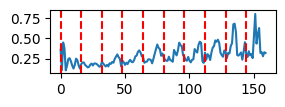

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure()

for i, num_train_interactions in enumerate(grad_norm):
    ax = plt.subplot(len(grad_norm), 2, 2 * i + 1)
    gn = grad_norm[num_train_interactions][0]
    gn_mean = np.mean(gn, axis=0)
    gn_std = np.std(gn, axis=0) / np.sqrt(gn_mean.shape[0])
    plt.plot(range(gn_mean.shape[0]), gn_mean)
    plt.fill_between(range(gn_mean.shape[0]), gn_mean - gn_std, gn_mean + gn_std, alpha=0.2)
    for k in range(0, un_mean.shape[0], 16):
        plt.axvline(x=k, color='r', linestyle='--')
    if i == 0:
        ax.title.set_text("Grad Norm")

    ax = plt.subplot(len(grad_norm), 2, 2 * i + 2)
    un = update_norm[num_train_interactions][0]
    un_mean = np.mean(un, axis=0)
    un_std = np.std(un, axis=0) / np.sqrt(un_mean.shape[0])
    plt.plot(range(un_mean.shape[0]), un_mean)
    plt.plot(range(un_mean.shape[0]), un_mean - un_std, un_mean + un_std)
    for k in range(0, un_mean.shape[0], 16):
        plt.axvline(x=k, color='r', linestyle='--')
    if i == 0:
        ax.title.set_text("Update Norm")
plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [1]:
import wandb
from tqdm import tqdm
from collections import defaultdict

api = wandb.Api(timeout=120)

runs = api.sweep("oxwhirl/craftax-ppo-analysis/ybh6zi94").runs

metrics = [
    "m_cosine_similarity",
    "update_norm",
    "max_update",
    "max_grad",
    "grad_std",
    "v_cosine_similarity",
    "update_std",
    "grad_norm"
]


data = defaultdict(list)
for run in tqdm(runs, desc=" runs", position=0):
    records = run.scan_history(keys=metrics)
    metric_records = []
    for metric in tqdm(metrics, desc=" metrics", position=1, leave=False):
        metric_records.extend([record[metric] for record in records])
    data[metric].append(metric_records)

 runs:  25%|██▌       | 2/8 [05:56<17:55, 179.29s/it]

In [3]:
import pickle

with open("ppo_update_data.pickle", "rb") as f:
    data = pickle.load(f)

In [38]:
un = np.array(data["update_norm"])

un[un.shape[0] // 8: un.shape[0] // 8 + 10]

array([0.04089939, 0.04747364, 0.04535708, 0.04335257, 0.0462303 ,
       0.0505241 , 0.05256607, 0.05127414, 0.05039201, 0.04625465])

In [39]:
import numpy as np
np.array(data["update_norm"]).reshape((8, -1))[1, :10]

array([0.04089939, 0.04747364, 0.04535708, 0.04335257, 0.0462303 ,
       0.0505241 , 0.05256607, 0.05127414, 0.05039201, 0.04625465])

In [8]:
np_data = {k: np.array(v) for k, v in data.items()}

In [19]:
reshaped_np_data = {k: v.reshape((8, -1)) for k, v in np_data.items()}

In [10]:
metrics = list(np_data.keys())

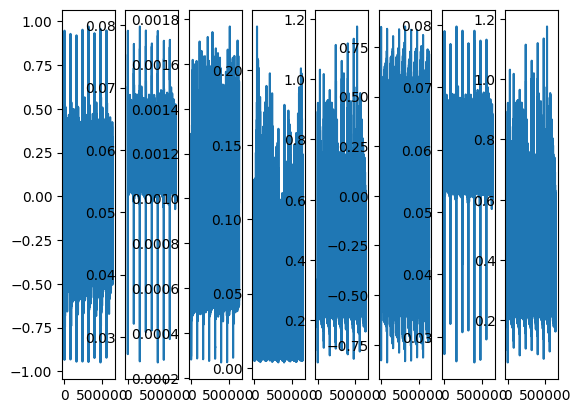

In [12]:
import matplotlib.pyplot as plt



for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i+1)
    plt.plot(list(range(np_data[metric].shape[0])), np_data[metric])

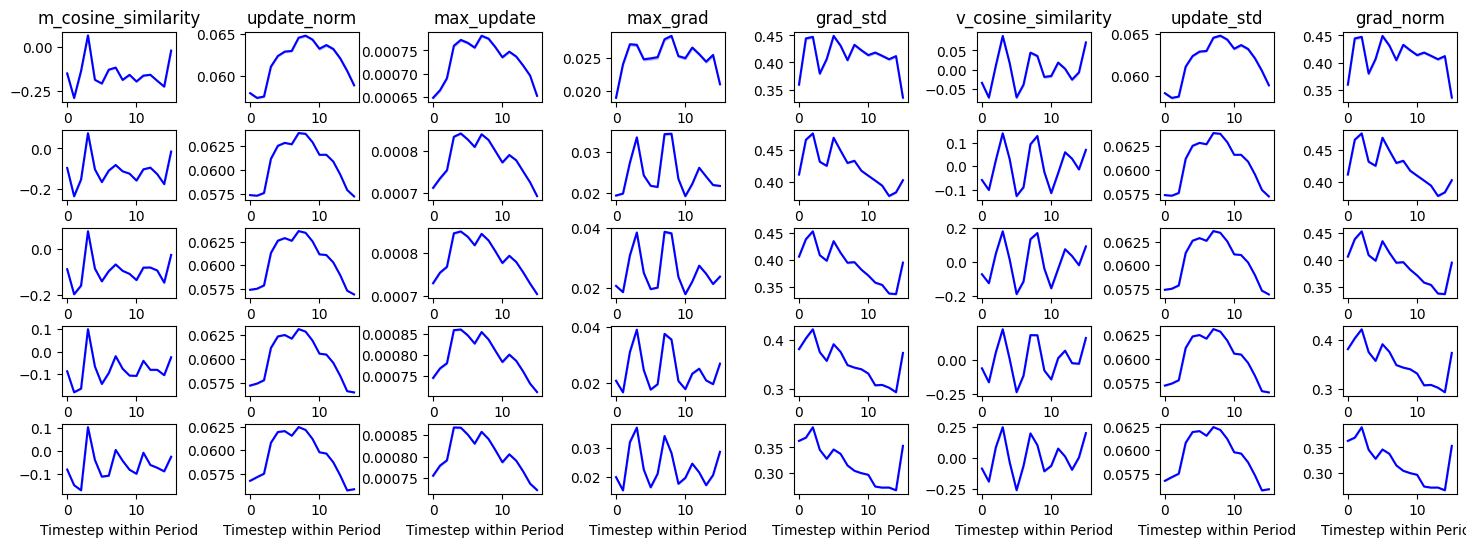

In [42]:
def plot_aggregated_mean_with_se(ax, data, period_length, metric, color="b"):
    """
    Plots the aggregated mean of each timestep in periods with shading representing the standard error.

    :param data: 1-D numpy array of data points.
    :param period_length: Length of each period to split the data into.
    """
    # Reshape the data to a 2D array where each row is a period
    # The last incomplete period is discarded
    num_complete_periods = len(data) // period_length
    data_reshaped = data[: num_complete_periods * period_length].reshape(
        num_complete_periods, period_length
    )

    # Calculate means and standard errors for each timestep across periods
    means = np.mean(data_reshaped, axis=0)
    standard_errors = np.std(data_reshaped, axis=0, ddof=1) / np.sqrt(
        num_complete_periods
    )

    # X-axis values
    x_values = np.arange(period_length)

    # Plotting
    ax.plot(x_values, means, color="b", label="Mean")
    ax.fill_between(
        x_values,
        means - standard_errors,
        means + standard_errors,
        color="b",
        alpha=0.2,
        label="Standard Error",
    )

    # plt.ylabel("Aggregated Value")
    # plt.title("Aggregated Mean and Standard Error Across Periods")
    # plt.legend()


period = 16
plt.figure(figsize=(18, 6))
splits = 5
for split in range(splits):
    for j, metric in enumerate(metrics):
        metric_data = reshaped_np_data[metric][:, :(metric_data.shape[0] // (period * splits)) * (period * splits)]
        metric_data = np.mean(metric_data, axis=0)
        split_size = metric_data.shape[0] // splits
        ax = plt.subplot(splits, len(metrics), split * len(metrics) + j + 1)
        plot_aggregated_mean_with_se(
            ax,
            metric_data[split_size * split : split_size * (split + 1)],
            period,
            metric,
        )
        if split == 0:
            ax.set_title(metric)
        if split == splits - 1:
            ax.set_xlabel("Timestep within Period")

plt.subplots_adjust(wspace=0.6, hspace=0.4)

KeyboardInterrupt: 

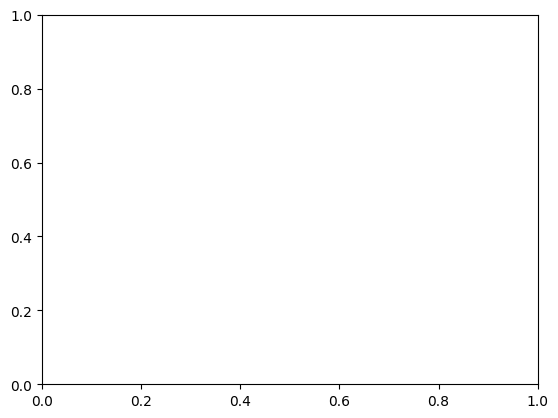

In [43]:
grad_norm = reshaped_np_data["grad_norm"]

mean = np.mean(grad_norm, axis=0)
std = np.std(grad_norm, axis=0) / np.sqrt(grad_norm.shape[0])
plt.plot(range(len(mean)), np.mean(grad_norm, axis=0))
plt.fill_between(range(len(mean)), )

grad_norm = reshaped_np_data["gr"]